<a href="https://colab.research.google.com/github/j54854/myColab/blob/main/Rinko_SImPy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SimPyを用いた離散事象シミュレーション入門 #1

#1 はじめに

工場や配送センター，顧客に何らかのサービスを提供する店舗などのシステムは，確率的な変動（ランダムな顧客の到着や設備の故障など）を含む不確実な環境の中で機能を果たしていかなければならない．したがって，その性能を評価する際には，与えられた確率的な環境の中に置かれたシステムの状態が時間とともにどのように変化していくかを追跡することが必要になる．そうしたシステムの状態推移データを多数集めることによって，システムの性能を統計的に評価することが可能になる．

このとき，実際の工場や店舗などのシステムで多数回の実験を行うことは一般には困難であるため，モデルを用いたシミュレーション実験が効果を発揮する．特に，生産や物流，サービス提供のシステムのシミュレーション実験には，離散事象シミュレーションと呼ばれる技術が用いられることが多い．本稿では，この離散事象シミュレーションの基礎を理解するとともに，[PythonのSimPyモジュール](https://simpy.readthedocs.io/en/latest/)を用いて，簡単な離散事象シミュレーションのモデルを構築するスキルを身につけよう．

#2 離散事象シミュレーションとは

##2.1 離散事象シミュレーションの基本的なメカニズム

あるシステムのシミュレーションを行うということは，そのシステムの状態が時間とともにどのように変化していくか，すなわちシステムの状態の時間発展を模擬的に作り出すことであるといえる．このとき，離散事象シミュレーションでは，対象システムの状態はなんらかの事象が生起したときに（だけ）変化すると考える．この状態変化についての考え方こそが，離散事象シミュレーションの基本的な特徴である．


そのため，離散事象シミュレーションを実行する際には，

* システムの状態を表す変数群（状態変数群）
* システムの状態を変化させる事象群
* 各事象が生じた際にシステムの状態がどのように変化するかを記述するルール
* 各事象が生起するタイミングを規定するルール

がそれそれ明確に定められていなければならない．これらは，具体的には，どのようなシステムを対象にしているのか，そのシステムのどのような側面に関心があるのか，などに応じて決まるものである．離散事象シミュレーションのためのモデル化とは，まさにこれらを適切かつ明確に設定していくことであるといえるだろう．

確率的な事象の生起タイミングは，その事象の生起間隔を確率変数と考え，その分布を指定することでモデル化することが多い．例えば，ランダムに生起する事象の生起間隔は指数分布に従うことを思い出そう．また，継続時間に不確実性を含む何らかの活動が終了するという事象は，その活動の継続時間の分布を，例えば正規分布などでモデル化し，開始時刻に継続時間の分布に従うある乱数を加えた時点に生起するように設定するといいだろう．

離散事象シミュレーションの機能を実装する最も基本的な方法は，事象をその生起タイミングの昇順に並べたリストを持っておき，その先頭から1つずつ事象を取り出してそれらを順次生起させていくという方法である．なお，このリストは，イベントカレンダなどと呼ばれる．イベントカレンダから事象を取り出すたびに，シミュレーション時間をその事象の生起タイミングまで進める．そして，その事象が生じた際にシステムの状態がどのように変化するかを記述するルールに従ってシステムの状態を表す変数群の値を更新する．



##2.2 事象とイベントカレンダの実装例

ここで，事象とイベントカレンダの（ごく簡単な）実装例をみておこう．

In [1]:
class Event:
    def __init__(self, time, kind):
        self.time = time  # when this event occurs
        self.kind = kind  # the type of this event

    def __str__(self):
        return self.kind

class Calendar:
    def __init__(self, horizon):
        self.queue = [Event(horizon, 'end')]  # list of events

    def append(self, e):  # add a new event to the list
        self.queue.append(e)
        self.queue.sort(key=lambda x: x.time)  # sort events chronologically

    def trigger(self):  # trigger the first event in the list
        e = self.queue.pop(0)
        return e

Eventは事象のクラスである．このクラスには，ひとまず，生起時刻（time）と事象タイプ（kind）の2つの情報をもたせてある．もし必要があれば，他のパラメータも追加していけばよい．

Calendarはイベントカレンダのクラスである．queueという名のリストがあり，その中に，endというタイプの事象（end事象）が1つ追加されている．これはシミュレーションを終了させるための事象であり，その生起タイミングを表す引数horizonには，インスタンス生成時に，シミュレーション期間の長さを渡せばよい．append(e)は，カレンダに新しい事象eを追加するメソッドである．事象eをリストqueueに追加した後，生起タイミングの昇順にソートし直していることがわかる．

trigger()は，リストqueueの先頭の事象を取り出するためのメソッドである．なお，ここでは，単にリストからその事象を取り出してreturnしているだけであり，その事象が生起することに伴う諸々の処理は別途実装する必要がある．また，簡単のためqueueが空だった場合の例外処理などは省略している．

なお，上でイベントカレンダはリストであると説明し，この実装例でも実際にリストで実装しているが，もちろん，事象が格納でき，生起タイミングの順で1つずつ取り出せるのであれば，ヒープなど，他のデータ構造を利用しても構わない．

## 2.3 シミュレーションモデル本体のスケルトン

続いて，これらの部品を使ってシミュレーションモデルの本体を実装するイメージをつかもう．例として，簡単なスケルトンを示す．

In [2]:
import random

class Skelton:
    def __init__(self, horizon):
        self.now = 0  # simulation time
        self.cal = Calendar(horizon)  # event calendar
        self.add_some_event()  # an initial event is added
        self.count = 0  # an example state variable (the number of events triggered)

    def add_event(self, dt, kind):
        e = Event(self.now +dt, kind)
        self.cal.append(e)

    def add_some_event(self):
        self.add_event(random.expovariate(1), 'some_event')

    def print_state(self):
        print('{} th event occurs at {}'.format(self.count, round(self.now)))

    def run(self):
        while True:
            self.print_state()
            e = self.cal.trigger()
            print(e)
            self.now = e.time  # advance the simulation time
            self.count += 1  # increment the event counter
            if e.kind == 'end':  # time is up
                break
            else:
                self.add_some_event()  # next event is added

Skeltonはシミュレーションモデル（のスケルトン）のクラスである．その中の変数now（初期値は0）でシミュレーション時間を管理するようになっている．また，calは，イベントカレンダのインスタンスで，モデル生成時に渡された引数horizonをそのまま引き継いで生成されていることがわかる．countはシステムの状態変数のダミーで，事象の発生回数をカウントするようになっている．実用的なモデルを実装する際には，これを必要な状態変数群に置きかえるといいだろう．

add_event()は，生起時刻までの時間とタイプを引数として受け取り，その新しい事象をイベントカレンダに追加するメソッドである．さらに，生起時刻までの時間がある指数分布に従う乱数で与えられるsome_eventというタイプのダミー事象を1つ追加するメソッドadd_some_event()も定義してある．priint_state()は，システムの状態をコンソールに書き出すメソッドである．

最後のrun()は，シミュレーションを実行するためのメソッドである．whileループの中で，まずシステムの状態を書き出した後，イベントカレンダから事象を取り出し，その事象のタイプを書き出し，シミュレーション時間を進め，事象の生起回数countをインクリメントしていることがわかる．生起した事象がendであれば，whileループを抜けてシミュレーション終了となるが，そうでなければ，新たなsome_event事象をイベントカレンダに追加して次のループに進んでいる．

実際にこの（スケルトン）シミュレーションモデルを動かしてみよう．そのためには，下記のように，まずインスタンスを生成してから，run()メソッドでそれを実行すればよい（上の，Eventクラス，Calendarクラス，Modelクラスのコードも忘れずに実行しておくこと）．

In [3]:
model = Skelton(200)
model.run()

0 th event occurs at 0
some_event
1 th event occurs at 1
some_event
2 th event occurs at 1
some_event
3 th event occurs at 2
some_event
4 th event occurs at 2
some_event
5 th event occurs at 3
some_event
6 th event occurs at 4
some_event
7 th event occurs at 5
some_event
8 th event occurs at 6
some_event
9 th event occurs at 7
some_event
10 th event occurs at 8
some_event
11 th event occurs at 9
some_event
12 th event occurs at 10
some_event
13 th event occurs at 10
some_event
14 th event occurs at 11
some_event
15 th event occurs at 11
some_event
16 th event occurs at 12
some_event
17 th event occurs at 14
some_event
18 th event occurs at 15
some_event
19 th event occurs at 16
some_event
20 th event occurs at 17
some_event
21 th event occurs at 18
some_event
22 th event occurs at 19
some_event
23 th event occurs at 20
some_event
24 th event occurs at 21
some_event
25 th event occurs at 23
some_event
26 th event occurs at 25
some_event
27 th event occurs at 26
some_event
28 th event oc

ランダムに事象が1つずつ生起し，それに応じてシミュレーション時間が進行していっている様子がわかる．この単純な流れが離散事象シミュレーションのアルゴリズムの基本構造なので，ここでしっかり頭に入れておこう．

##2.4 簡単な具体例

続いて，上記のスケルトンに少し肉付けして，具体的なシミュレーションモデル（といってもごく簡単なもの）を1つ作ってみよう．ある品物の在庫を定量発注方式で管理している商店に，ランダムに顧客が訪れ，その品物を購入していくという状況をモデル化してみる．顧客は来店時に店頭に在庫があれば品物を1個購入して帰り，在庫がない場合には機会損失が生じるものとしよう．また，顧客の平均到着間隔は1であるとする．

EventクラスとCalendarクラスはそのまま利用して，Skeltonクラスを継承し，この具体例に合わせて少し肉付けしていくことで，Modelクラスを定義することにする．下のコードはその一例である．

In [4]:
 class Model(Skelton):
    def __init__(self, horizon, op, oq, lt, init):
        self.now = 0  # simulation time
        self.cal = Calendar(horizon)  # event calendar
        self.add_arrival()  # an arrival event is added
        self.op = op  # ordering point
        self.oq = oq  # order quantity
        self.lt = lt  # reprenishment lead time
        self.at_hand = init  # how many items you have at hand
        self.loss = 0  # opportunity loss
        self.orders = []  # list of back orders

    @property
    def total(self):  # total inventory level including back orders
        return sum(self.orders) +self.at_hand

    def add_arrival(self):  # arrival of a customer
        self.add_event(random.expovariate(1), 'arrival')

    def add_fill_up(self):  # replenishment of ordered items
        self.add_event(self.lt, 'fill_up')

    def sell_or_apologize(self):
        if self.at_hand > 0:
            self.at_hand -= 1  # an item is sold
        else:
            self.loss += 1  # sorry we are out of stock

    def fill_up(self):  # receive the first order in the list
        if len(self.orders) > 0:
            self.at_hand += self.orders.pop(0)

    def stocktake(self):
        if self.total <= self.op:
            self.orders.append(self.oq)
            return True  # ordered
        return False  # not ordered

    def print_state(self):
        print('[{}] current level: {}, back order: {}, lost sales: {} '.format(round(self.now), self.at_hand, self.orders, self.loss))

    def run(self):
        while True:
            self.print_state()
            e = self.cal.trigger()
            print(e)
            self.now = e.time  # advance the simulation time
            if e.kind == 'end':  # time is up
                break
            elif e.kind == 'fill_up':
                self.fill_up()
            elif e.kind == 'arrival':
                self.sell_or_apologize()
                self.add_arrival()
                ordered = self.stocktake()
                if ordered:
                    self.add_fill_up()

シミュレーションモデルのインスタンス生成時に指定する引数として，シミュレーション期間（horizon）に加えて，発注点（op），発注量（oq），補充リードタイム（lt），初期在庫量（init）の4つが追加されている．さらに，状態変数のcountは削除され，代わりに，店頭在庫量（at_hand），機会損失発生回数（loss），未補充発注（バックオーダ）のリスト（orders）が追加されている．また，イベントカレンダには，最初にarrival事象が1つ追加されていることがわかる．これは最初の顧客の来店に対応する事象である．

メソッドについてみてみると，add_arrival()とadd_fill_up()は，新しいarrival事象とfill_up事象をそれぞれイベントカレンダに追加する役割を果たしていることがわかる．sell_or_apologize()には，来店した顧客への対応（在庫があれば1つ販売，なければ機会損失発生回数を1つ加算）が記述されている．一方，fill_up()は，補充に対応するメソッドである．stocktake()は，（バックオーダを含めたトータルの）在庫レベルを確認し，定量発注方式のルールに従って発注するかどうかを判断し，必要であれば所定の量を発注する，という処理に対応している．

run()メソッドの中では，事象発生時の処理が今回の対象システムに応じて少し変更されている．具体的には，発生した事象がfill_up事象であれば，単にfill_up()メソッドを呼んでいる．arrival事象であれば，顧客対応（sell_or_apologize()メソッド）を行い，次のarrivall事象をイベントカレンダに追加した後，在庫レベルの確認と発注の判断（stocktake()メソッド）を行っていることがわかる．また，ここで発注を行った場合は，その発注に対応するfill_up事象をイベントカレンダに追加している．

例えば，シミュレーション期間horizon=200，発注点op=10，発注量oq=20，補充リードタイムlt=10，初期在庫量init=20として，このモデルを動かしてみるには，下のコードを実行すればよい．

In [5]:
model = Model(200, 10, 20, 10, 20)  # horizon, op, oq, lt, init
model.run()

[0] current level: 20, back order: [], lost sales: 0 
arrival
[1] current level: 19, back order: [], lost sales: 0 
arrival
[1] current level: 18, back order: [], lost sales: 0 
arrival
[1] current level: 17, back order: [], lost sales: 0 
arrival
[2] current level: 16, back order: [], lost sales: 0 
arrival
[2] current level: 15, back order: [], lost sales: 0 
arrival
[2] current level: 14, back order: [], lost sales: 0 
arrival
[3] current level: 13, back order: [], lost sales: 0 
arrival
[4] current level: 12, back order: [], lost sales: 0 
arrival
[4] current level: 11, back order: [], lost sales: 0 
arrival
[6] current level: 10, back order: [20], lost sales: 0 
arrival
[8] current level: 9, back order: [20], lost sales: 0 
arrival
[10] current level: 8, back order: [20], lost sales: 0 
arrival
[10] current level: 7, back order: [20], lost sales: 0 
arrival
[15] current level: 6, back order: [20], lost sales: 0 
arrival
[15] current level: 5, back order: [20], lost sales: 0 
arriv

##2.5 ログの取得と簡単なグラフ表示　

シミュレーションの結果が単に文字列として画面上を流れていくだけだとわかりにくいので，まとめてグラフ表示してみることを考える．そのためにまず，簡単なログのクラスを導入しておこう．この種のクラスは，シミュレーション結果をcsvファイルなどに書き出したいときにも役立つだろう．

In [6]:
class Log:
    def __init__(self):
        self.time = []
        self.at_hand = []
        self.loss = []
        self.total = []

    def extend(self, model):
        self.time.append(model.now)
        self.at_hand.append(model.at_hand)
        self.loss.append(model.loss)
        self.total.append(model.total)

    def plot_log(self):
        plt.plot(self.time, self.at_hand, drawstyle = "steps-post")
        plt.xlabel("time (minute)")
        plt.ylabel("number of items")
        plt.show()

とりあえずとして，事象が生起した時刻ごとに，その時点での店頭在庫量（at_hand），機会損失発生回数（loss），トータルの在庫レベル（total）の値をログに格納していくことにする．これらの各変数の値を格納するリストを用意しておき，extend(model)メソッドで，その時点でのmodelの各変数の値をそれぞれ対応するリストに追加するように実装されていることがわかる．なお，plot_log()メソッドは，結果を折れ線グラフで表示するためのメソッドだが，ここでは詳細は省略する．

これを，上で作成したモデルに追加してみよう．ほんの3行追加しただけだが，下に変更後のModel4Plotクラスを示しておく（上のModelクラスを継承しており，追加した3行にはそれを明示するコメントを付与してある）．

In [7]:
class Model4Plot(Model):
    def __init__(self, horizon, op, oq, lt, init):
        super().__init__(horizon, op, oq, lt, init)
        self.log = Log()  # <-- added
        self.log.extend(self)  # <-- added

    def run(self):
        while True:
            self.print_state()
            self.log.extend(self)  # <-- added
            e = self.cal.trigger()
            print(e)
            self.now = e.time
            if e.kind == 'end':
                break
            elif e.kind == 'fill_up':
                self.fill_up()
            elif e.kind == 'arrival':
                self.sell_or_apologize()
                self.add_arrival()
                ordered = self.stocktake()
                if ordered:
                    self.add_fill_up()

これでシミュレーション途中のシステムの状態がログ（model.log）に順次保存されていくことになる．その結果，シミュレーションの実行後に，このデータを使って，例えば，下のようなコードで，店頭在庫量の推移を折れ線グラフで表示してみることなどができるようになった．

[0] current level: 20, back order: [], lost sales: 0 
arrival
[0] current level: 19, back order: [], lost sales: 0 
arrival
[0] current level: 18, back order: [], lost sales: 0 
arrival
[0] current level: 17, back order: [], lost sales: 0 
arrival
[2] current level: 16, back order: [], lost sales: 0 
arrival
[3] current level: 15, back order: [], lost sales: 0 
arrival
[4] current level: 14, back order: [], lost sales: 0 
arrival
[5] current level: 13, back order: [], lost sales: 0 
arrival
[5] current level: 12, back order: [], lost sales: 0 
arrival
[6] current level: 11, back order: [], lost sales: 0 
arrival
[9] current level: 10, back order: [20], lost sales: 0 
arrival
[11] current level: 9, back order: [20], lost sales: 0 
arrival
[11] current level: 8, back order: [20], lost sales: 0 
arrival
[12] current level: 7, back order: [20], lost sales: 0 
arrival
[12] current level: 6, back order: [20], lost sales: 0 
arrival
[16] current level: 5, back order: [20], lost sales: 0 
arri

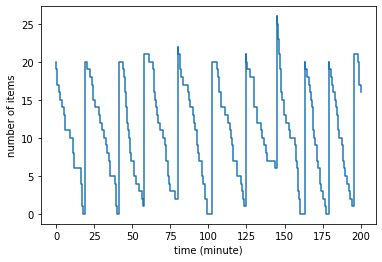

In [8]:
import matplotlib.pyplot as plt

model = Model4Plot(200, 10, 20, 10, 20)  # horizon, op, oq, lt, init
model.run()
model.log.plot_log()

#3 演習問題

最後に，上で導入したスケルトンをベースにして，簡単なシステムのシミュレーションモデルの自作に挑戦してみよう．今回の対象は，次のようなシステムであるとする．

* 座席数が有限（=cap）の飲食店のランチタイムをモデル化する．
* 顧客は1人ずつランダムにやってくる（到着間隔は平均1の指数分布に従う）．
* 顧客は，店内の座席に空きがあればすぐに入店できるが，満席だと列に並ばないといけない．
* 列の長さがある値（=ub）以上の場合，顧客は列には並ばずに諦めて帰る（機会損失が発生する）．
* 着席した顧客は，ランチを注文し，それを食べ，支払いを済ませて帰る．それら一連の行動の全体にかかる時間はある正規分布（平均=mt，分散=vt）に従う乱数で与えられる．


#4 まとめ

今回は，離散事象シミュレーションの基本的なメカニズムとその簡単な実装例を紹介した．「SimPyを用いた」というタイトルなので，次回からは（今回は出てこなかったが）SimPyに触れていきたい．